In [1]:
#svm-support vector machine
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/0.MKCE/Datasets/Social_Network_Ads.csv")

In [3]:
df=pd.get_dummies(df)

In [4]:
x=df.drop(['Purchased'],axis=1)

In [5]:
y=df['Purchased'].values

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [7]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [42]:
#fiting svm to the training set
from sklearn.svm import SVC
classifier2=SVC(kernel='rbf',probability= True, random_state=0)
classifier2.fit(x_train,y_train)

SVC(probability=True, random_state=0)

In [41]:
classifier2.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [43]:
#predicting the test set results
y_pred2=classifier2.predict(x_test)

In [44]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred2)

0.92

In [45]:
#making confusion matrix
confusion_matrix(y_test,y_pred2)

array([[64,  4],
       [ 4, 28]])

In [46]:
#classification report
z=classification_report(y_test,y_pred2)
print(z) 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [47]:
#for computing Receiver operating characteristics
from sklearn.metrics import roc_curve
#for computing area under curve
from sklearn.metrics import roc_auc_score

In [48]:
#visualizing the ROC-AUC curve
y_proba=classifier2.predict_proba(x_test)

#we take the predicted values of class 1
y_predicted=y_proba[:,1]

#we check to see if the right values have been considered from the predicted values
print(y_predicted)

[0.06487154 0.06481808 0.03854901 0.03249812 0.03200872 0.07152784
 0.11876328 0.97561626 0.0401064  0.71252143 0.00944477 0.01477504
 0.0272774  0.17349447 0.11603974 0.67392227 0.05509601 0.17618327
 0.92358437 0.11087928 0.04773159 0.96412145 0.13958291 0.83064255
 0.03342787 0.96156359 0.050876   0.03555486 0.04888202 0.07115621
 0.23788476 0.09627075 0.89838916 0.04073723 0.01358638 0.04614107
 0.0667627  0.06115947 0.02141302 0.92071678 0.0802529  0.12108905
 0.04461321 0.10295609 0.79179521 0.01056206 0.08570353 0.87407124
 0.02634617 0.78476996 0.94471188 0.10110309 0.06717683 0.85601792
 0.95053295 0.60677427 0.04585183 0.04781979 0.78303066 0.05722676
 0.10331173 0.96349033 0.11471294 0.35064872 0.04643876 0.9503775
 0.08485209 0.01003384 0.11196278 0.16029623 0.95733438 0.05782738
 0.02867885 0.8605039  0.10311854 0.1569857  0.21757071 0.15210192
 0.85176016 0.77518991 0.92510554 0.95413377 0.01240649 0.01475199
 0.96733716 0.23101162 0.11092434 0.94217336 0.6211658  0.11079

In [49]:
#using roc_curve() to generate fpr & tpr values
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [50]:
#passing the fpr&tpr values to auc()to calculate the area under curve
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.9613970588235294


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

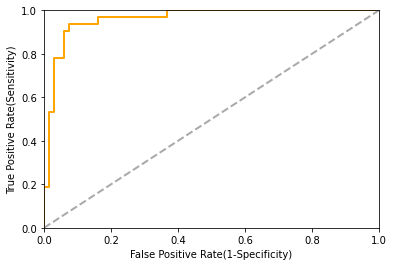

In [51]:
#plotting the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
